In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from DQN import DQN
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
env = gym.make(                          ## initialize the enverionment 
    "LunarLander-v2",
    continuous=False,
    gravity=-10.0,
    enable_wind=False,
    wind_power=15.0,
    turbulence_power=1.5,
)

In [3]:
policy_net = DQN(8, 4).to("cuda")
#policy_net.load_state_dict(torch.load('policy_net_model.pth'))

target_net = DQN(8, 4).to("cuda")
target_net.load_state_dict(policy_net.state_dict())          # initialize the weights and bias
target_net.eval()

DQN(
  (fc1): Linear(in_features=8, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)

In [4]:
optimizer = optim.Adam(policy_net.parameters(), lr=0.0001, weight_decay=1e-5)
replay_memory = []
criterion = nn.MSELoss()

batch_size = 64
gamma = 0.99
epsilon = 1.0
max_steps = 900
episode_rewards = []


C:\Users\Zheng\AppData\Local\Temp\ipykernel_34520\2294431296.py:52: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:264.)
  batch_states = torch.FloatTensor(batch_states).to("cuda")


Episode 0: Total Reward = -108.80733562606991, Average Loss = 7.9183, Epsilon: 0.995
Episode 1: Total Reward = -112.60986386112751, Average Loss = 92.2386, Epsilon: 0.990025
Episode 2: Total Reward = -79.64558910535658, Average Loss = 112.0171, Epsilon: 0.985074875
Episode 3: Total Reward = -123.23114919392478, Average Loss = 118.7768, Epsilon: 0.9801495006250001
Episode 4: Total Reward = -404.42518438504015, Average Loss = 112.8416, Epsilon: 0.9752487531218751
Episode 5: Total Reward = -232.55339778349924, Average Loss = 122.8940, Epsilon: 0.9703725093562657
Episode 6: Total Reward = -449.4822699889637, Average Loss = 125.3865, Epsilon: 0.9655206468094844
Episode 7: Total Reward = -280.4941192531651, Average Loss = 102.0268, Epsilon: 0.960693043575437
Episode 8: Total Reward = -125.10119075206393, Average Loss = 124.5181, Epsilon: 0.9558895783575597
Episode 9: Total Reward = -206.37947756002472, Average Loss = 109.6231, Epsilon: 0.9511101304657719
Episode 10: Total Reward = -455.18006

Episode 83: Total Reward = -97.8617082939423, Average Loss = 32.2262, Epsilon: 0.6563549768288433
Episode 84: Total Reward = -49.199005575496194, Average Loss = 24.3073, Epsilon: 0.653073201944699
Episode 85: Total Reward = -59.287249590467866, Average Loss = 20.9151, Epsilon: 0.6498078359349755
Episode 86: Total Reward = -99.37883176678767, Average Loss = 25.4185, Epsilon: 0.6465587967553006
Episode 87: Total Reward = -61.47146709551907, Average Loss = 28.6696, Epsilon: 0.6433260027715241
Episode 88: Total Reward = -82.36156061035916, Average Loss = 26.3835, Epsilon: 0.6401093727576664
Episode 89: Total Reward = -93.33490197931566, Average Loss = 27.5814, Epsilon: 0.6369088258938781
Episode 90: Total Reward = -98.78572541454406, Average Loss = 21.7847, Epsilon: 0.6337242817644086
Episode 91: Total Reward = -73.7699195610451, Average Loss = 21.7217, Epsilon: 0.6305556603555866
Episode 92: Total Reward = -48.58671108034139, Average Loss = 23.5734, Epsilon: 0.6274028820538087
Episode 93:

Episode 165: Total Reward = -28.036014042337385, Average Loss = 13.1288, Epsilon: 0.4351424010585501
Episode 166: Total Reward = -127.34982774078291, Average Loss = 15.6294, Epsilon: 0.43296668905325736
Episode 167: Total Reward = -59.99598159253767, Average Loss = 12.9787, Epsilon: 0.43080185560799106
Episode 168: Total Reward = -146.5359252026635, Average Loss = 16.6597, Epsilon: 0.4286478463299511
Episode 169: Total Reward = -63.762431177406384, Average Loss = 14.3295, Epsilon: 0.42650460709830135
Episode 170: Total Reward = -200.55294619938496, Average Loss = 14.7769, Epsilon: 0.42437208406280985
Episode 171: Total Reward = -217.39385247868572, Average Loss = 14.6278, Epsilon: 0.4222502236424958
Episode 172: Total Reward = -42.3438700220588, Average Loss = 16.3517, Epsilon: 0.42013897252428334
Episode 173: Total Reward = -194.82201127245847, Average Loss = 14.4612, Epsilon: 0.4180382776616619
Episode 174: Total Reward = -288.9310712836474, Average Loss = 14.3649, Epsilon: 0.4159480

Episode 247: Total Reward = -164.38517561731447, Average Loss = 11.0323, Epsilon: 0.2884855236625661
Episode 248: Total Reward = -117.22985811744707, Average Loss = 10.0174, Epsilon: 0.28704309604425327
Episode 249: Total Reward = -94.58499627779631, Average Loss = 11.4766, Epsilon: 0.285607880564032
Episode 250: Total Reward = -98.41257803323347, Average Loss = 10.4321, Epsilon: 0.28417984116121187
Episode 251: Total Reward = -265.9802909347466, Average Loss = 12.2866, Epsilon: 0.2827589419554058
Episode 252: Total Reward = -98.58779305860364, Average Loss = 10.5793, Epsilon: 0.28134514724562876
Episode 253: Total Reward = -112.84447430923122, Average Loss = 10.4824, Epsilon: 0.2799384215094006
Episode 254: Total Reward = -137.86965651302648, Average Loss = 10.2899, Epsilon: 0.27853872940185365
Episode 255: Total Reward = -170.039629946558, Average Loss = 9.4978, Epsilon: 0.27714603575484437
Episode 256: Total Reward = -137.27672573827505, Average Loss = 10.0039, Epsilon: 0.2757603055

Episode 330: Total Reward = -29.102743499459947, Average Loss = 3.6256, Epsilon: 0.1903004112552766
Episode 331: Total Reward = 128.1983551624427, Average Loss = 4.1711, Epsilon: 0.18934890919900021
Episode 332: Total Reward = 175.48579284070257, Average Loss = 4.5640, Epsilon: 0.18840216465300522
Episode 333: Total Reward = 145.2582251159892, Average Loss = 3.5025, Epsilon: 0.18746015382974018
Episode 334: Total Reward = 185.09530612979106, Average Loss = 5.1726, Epsilon: 0.1865228530605915
Episode 335: Total Reward = 87.49586756915537, Average Loss = 3.4819, Epsilon: 0.18559023879528855
Episode 336: Total Reward = 136.6835537929204, Average Loss = 5.4555, Epsilon: 0.1846622876013121
Episode 337: Total Reward = 126.08542867193455, Average Loss = 5.0741, Epsilon: 0.18373897616330553
Episode 338: Total Reward = -30.41888136473524, Average Loss = 6.6858, Epsilon: 0.182820281282489
Episode 339: Total Reward = 133.6212347658772, Average Loss = 4.4446, Epsilon: 0.18190617987607657
Episode 3

Episode 413: Total Reward = 211.4019742885815, Average Loss = 9.6271, Epsilon: 0.1255322834371622
Episode 414: Total Reward = 40.071738451220384, Average Loss = 9.3925, Epsilon: 0.12490462201997637
Episode 415: Total Reward = 143.15404710545164, Average Loss = 12.1907, Epsilon: 0.1242800989098765
Episode 416: Total Reward = 138.8192023798914, Average Loss = 10.1474, Epsilon: 0.12365869841532712
Episode 417: Total Reward = 194.21578552912098, Average Loss = 11.5919, Epsilon: 0.12304040492325048
Episode 418: Total Reward = 231.7703641484548, Average Loss = 8.8799, Epsilon: 0.12242520289863423
Episode 419: Total Reward = 110.53309340410738, Average Loss = 8.7395, Epsilon: 0.12181307688414106
Episode 420: Total Reward = 111.50712662500803, Average Loss = 7.3057, Epsilon: 0.12120401149972035
Episode 421: Total Reward = 233.67460827974776, Average Loss = 7.9849, Epsilon: 0.12059799144222175
Episode 422: Total Reward = 146.57174218031673, Average Loss = 9.8754, Epsilon: 0.11999500148501063
Ep

Episode 496: Total Reward = 260.01063734595925, Average Loss = 14.5863, Epsilon: 0.0996820918179746
Episode 497: Total Reward = 234.57391192827686, Average Loss = 10.3531, Epsilon: 0.0996820918179746
Episode 498: Total Reward = 271.96548790415926, Average Loss = 8.1924, Epsilon: 0.0996820918179746
Episode 499: Total Reward = 208.76430373113521, Average Loss = 12.4044, Epsilon: 0.0996820918179746
Episode 500: Total Reward = 242.174776347938, Average Loss = 11.9657, Epsilon: 0.0996820918179746
Episode 501: Total Reward = 174.73609230567217, Average Loss = 15.2121, Epsilon: 0.0996820918179746
Episode 502: Total Reward = 198.21620452591856, Average Loss = 14.9593, Epsilon: 0.0996820918179746
Episode 503: Total Reward = 161.76003509398367, Average Loss = 13.7955, Epsilon: 0.0996820918179746
Episode 504: Total Reward = 252.6948328614759, Average Loss = 14.3709, Epsilon: 0.0996820918179746
Episode 505: Total Reward = 199.10187810003958, Average Loss = 12.7634, Epsilon: 0.0996820918179746
Epis

Episode 579: Total Reward = 231.85305919237413, Average Loss = 13.3981, Epsilon: 0.0996820918179746
Episode 580: Total Reward = 236.04810154560516, Average Loss = 14.9981, Epsilon: 0.0996820918179746
Episode 581: Total Reward = -26.801291765901617, Average Loss = 13.0867, Epsilon: 0.0996820918179746
Episode 582: Total Reward = 236.08193808136065, Average Loss = 12.1886, Epsilon: 0.0996820918179746
Episode 583: Total Reward = 171.86846577937663, Average Loss = 15.1112, Epsilon: 0.0996820918179746
Episode 584: Total Reward = 14.922991436030053, Average Loss = 13.2614, Epsilon: 0.0996820918179746
Episode 585: Total Reward = 244.16996329511414, Average Loss = 11.6086, Epsilon: 0.0996820918179746
Episode 586: Total Reward = 219.87082116453695, Average Loss = 14.7831, Epsilon: 0.0996820918179746
Episode 587: Total Reward = 161.40164641005612, Average Loss = 9.8515, Epsilon: 0.0996820918179746
Episode 588: Total Reward = 230.65232166845044, Average Loss = 9.5734, Epsilon: 0.0996820918179746
E

Episode 662: Total Reward = 243.03131839298436, Average Loss = 11.2411, Epsilon: 0.0996820918179746
Episode 663: Total Reward = 233.3618850713534, Average Loss = 15.8508, Epsilon: 0.0996820918179746
Episode 664: Total Reward = 247.1105523650208, Average Loss = 9.9190, Epsilon: 0.0996820918179746
Episode 665: Total Reward = 218.26874371231946, Average Loss = 14.6748, Epsilon: 0.0996820918179746
Episode 666: Total Reward = 210.41877538571407, Average Loss = 12.8632, Epsilon: 0.0996820918179746
Episode 667: Total Reward = 254.45892474695984, Average Loss = 14.7524, Epsilon: 0.0996820918179746
Episode 668: Total Reward = 231.67513981201523, Average Loss = 13.5107, Epsilon: 0.0996820918179746
Episode 669: Total Reward = 239.19924722447632, Average Loss = 15.1954, Epsilon: 0.0996820918179746
Episode 670: Total Reward = 222.78209991013875, Average Loss = 10.9769, Epsilon: 0.0996820918179746
Episode 671: Total Reward = 141.8553297699923, Average Loss = 15.2334, Epsilon: 0.0996820918179746
Epis

Episode 745: Total Reward = 237.6354673449822, Average Loss = 16.5440, Epsilon: 0.0996820918179746
Episode 746: Total Reward = 246.28250061886968, Average Loss = 11.1322, Epsilon: 0.0996820918179746
Episode 747: Total Reward = 239.48112003061016, Average Loss = 13.5004, Epsilon: 0.0996820918179746
Episode 748: Total Reward = 213.84594228966853, Average Loss = 13.8669, Epsilon: 0.0996820918179746
Episode 749: Total Reward = 221.52022222500494, Average Loss = 14.8354, Epsilon: 0.0996820918179746
Episode 750: Total Reward = 33.93868121791583, Average Loss = 13.4158, Epsilon: 0.0996820918179746
Episode 751: Total Reward = 271.17424017401055, Average Loss = 15.3483, Epsilon: 0.0996820918179746
Episode 752: Total Reward = 17.766032164549557, Average Loss = 13.5945, Epsilon: 0.0996820918179746
Episode 753: Total Reward = 190.46142695467495, Average Loss = 14.4934, Epsilon: 0.0996820918179746
Episode 754: Total Reward = 253.34919596076946, Average Loss = 14.1701, Epsilon: 0.0996820918179746
Ep

Episode 828: Total Reward = 267.3994228223674, Average Loss = 15.9036, Epsilon: 0.0996820918179746
Episode 829: Total Reward = 230.3760893629157, Average Loss = 18.3228, Epsilon: 0.0996820918179746
Episode 830: Total Reward = 245.6785806159474, Average Loss = 19.6707, Epsilon: 0.0996820918179746
Episode 831: Total Reward = 266.71202496927515, Average Loss = 15.9339, Epsilon: 0.0996820918179746
Episode 832: Total Reward = 237.89877235402508, Average Loss = 13.0574, Epsilon: 0.0996820918179746
Episode 833: Total Reward = 246.93272522347263, Average Loss = 15.7205, Epsilon: 0.0996820918179746
Episode 834: Total Reward = 174.78333746529867, Average Loss = 15.0482, Epsilon: 0.0996820918179746
Episode 835: Total Reward = 224.91618494120507, Average Loss = 13.2677, Epsilon: 0.0996820918179746
Episode 836: Total Reward = 277.12148905833885, Average Loss = 14.6665, Epsilon: 0.0996820918179746
Episode 837: Total Reward = 215.54259348044195, Average Loss = 12.0543, Epsilon: 0.0996820918179746
Epi

Episode 911: Total Reward = 243.92964122204307, Average Loss = 16.9089, Epsilon: 0.0996820918179746
Episode 912: Total Reward = 251.33972089886532, Average Loss = 12.8639, Epsilon: 0.0996820918179746
Episode 913: Total Reward = 235.63301307029172, Average Loss = 13.5532, Epsilon: 0.0996820918179746
Episode 914: Total Reward = 253.90804200235056, Average Loss = 14.7413, Epsilon: 0.0996820918179746
Episode 915: Total Reward = 253.82707895228253, Average Loss = 14.1044, Epsilon: 0.0996820918179746
Episode 916: Total Reward = 197.63244511313545, Average Loss = 10.4928, Epsilon: 0.0996820918179746
Episode 917: Total Reward = 234.9131192908128, Average Loss = 17.3425, Epsilon: 0.0996820918179746
Episode 918: Total Reward = 236.8420135941393, Average Loss = 14.4774, Epsilon: 0.0996820918179746
Episode 919: Total Reward = 286.541565706691, Average Loss = 24.0715, Epsilon: 0.0996820918179746
Episode 920: Total Reward = 232.0210874650532, Average Loss = 15.7200, Epsilon: 0.0996820918179746
Episo

Episode 994: Total Reward = 239.1286761069215, Average Loss = 11.2944, Epsilon: 0.0996820918179746
Episode 995: Total Reward = 220.3491115866742, Average Loss = 13.0763, Epsilon: 0.0996820918179746
Episode 996: Total Reward = 238.31827566771142, Average Loss = 16.1051, Epsilon: 0.0996820918179746
Episode 997: Total Reward = 222.2413679240224, Average Loss = 14.5692, Epsilon: 0.0996820918179746
Episode 998: Total Reward = 244.41821618302146, Average Loss = 15.3044, Epsilon: 0.0996820918179746
Episode 999: Total Reward = 229.77470061619232, Average Loss = 18.6161, Epsilon: 0.0996820918179746
Episode 1000: Total Reward = 179.50619985867445, Average Loss = 10.7608, Epsilon: 0.0996820918179746
Episode 1001: Total Reward = 211.13292842319953, Average Loss = 14.0792, Epsilon: 0.0996820918179746
Episode 1002: Total Reward = 247.14995831368208, Average Loss = 17.5536, Epsilon: 0.0996820918179746
Episode 1003: Total Reward = 194.63413464180306, Average Loss = 11.2628, Epsilon: 0.0996820918179746

Episode 1076: Total Reward = 219.00305622895723, Average Loss = 11.8181, Epsilon: 0.0996820918179746
Episode 1077: Total Reward = 243.52238210582806, Average Loss = 13.1310, Epsilon: 0.0996820918179746
Episode 1078: Total Reward = -32.85513151191401, Average Loss = 11.2150, Epsilon: 0.0996820918179746
Episode 1079: Total Reward = 197.35223560121153, Average Loss = 12.2237, Epsilon: 0.0996820918179746
Episode 1080: Total Reward = 236.92068285875172, Average Loss = 11.9491, Epsilon: 0.0996820918179746
Episode 1081: Total Reward = 270.5411369315856, Average Loss = 11.1908, Epsilon: 0.0996820918179746
Episode 1082: Total Reward = 229.24072061378695, Average Loss = 11.8394, Epsilon: 0.0996820918179746
Episode 1083: Total Reward = 251.8887467101161, Average Loss = 11.6824, Epsilon: 0.0996820918179746
Episode 1084: Total Reward = 262.45317519234203, Average Loss = 15.2026, Epsilon: 0.0996820918179746
Episode 1085: Total Reward = 235.38023559062816, Average Loss = 12.4496, Epsilon: 0.099682091

Episode 1158: Total Reward = 245.7145824534163, Average Loss = 13.8516, Epsilon: 0.0996820918179746
Episode 1159: Total Reward = 260.00783715024244, Average Loss = 12.3674, Epsilon: 0.0996820918179746
Episode 1160: Total Reward = 255.0461741367493, Average Loss = 14.3634, Epsilon: 0.0996820918179746
Episode 1161: Total Reward = 251.29891634089608, Average Loss = 10.1699, Epsilon: 0.0996820918179746
Episode 1162: Total Reward = 203.69792722599072, Average Loss = 10.6051, Epsilon: 0.0996820918179746
Episode 1163: Total Reward = 206.8811868643873, Average Loss = 12.6781, Epsilon: 0.0996820918179746
Episode 1164: Total Reward = 240.4926520830345, Average Loss = 13.0067, Epsilon: 0.0996820918179746
Episode 1165: Total Reward = 258.7635124083633, Average Loss = 13.4935, Epsilon: 0.0996820918179746
Episode 1166: Total Reward = 252.91468210135753, Average Loss = 9.8428, Epsilon: 0.0996820918179746
Episode 1167: Total Reward = 271.4417546991368, Average Loss = 13.8511, Epsilon: 0.09968209181797

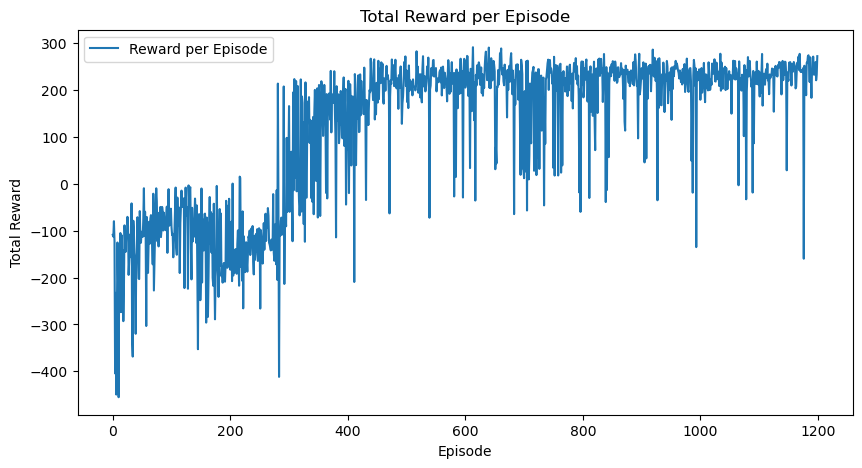

In [5]:
for episode in range(1200):
    observation = env.reset()        # Get a new environment 
    observation = observation[0]     # Get the valid information ( filter the empty element in the tuple)
    done = False                    # If landed
    total_reward = 0                
    step_count = 0                   # Count the step
    hover_counter = 0
    last_position = None            # track the previous position
    total_loss = 0 
    
    while not done:
       
        if step_count >= max_steps:  # Check for maximum steps
            break
        
        current_position = (observation[0], observation[1])
        
        if last_position is not None:  # Avoid the lander from hovering too long
            distance = np.sqrt((current_position[0] - last_position[0])**2 + (current_position[1] - last_position[1])**2)
            if distance < 0.05:  
                hover_counter += 1
            else:
                hover_counter = 0      # Reset the counter if the lander has moved

        last_position = current_position
        
        
        state_tensor = torch.FloatTensor(observation).unsqueeze(0).to("cuda")

        # Epsilon-greedy action
        if np.random.rand() < epsilon:
            action = env.action_space.sample()                       # Which action the lander takes, 0,1,2,3
        else:
            with torch.no_grad():                                    # disable the gradient tracking  
                action = policy_net(state_tensor).max(1)[1].item()   # get the best action 

        next_observation, reward, done, truncated, info = env.step(action)
        
        if hover_counter >= 90:  # If the lander hovers for 40 steps
            reward -= 0.2         # Apply a penalty of 10 to the reward

        # Store transition
        replay_memory.append((observation, action, reward, next_observation, done))
        if len(replay_memory) > 100000:
            replay_memory.pop(0)

        # Sample mini-batch and update policy_net
        if len(replay_memory) >= batch_size:                  # When the length of buffer greater than the batch size
            batch = random.sample(replay_memory, batch_size)
            batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones = zip(*batch)

            batch_states = torch.FloatTensor(batch_states).to("cuda")
            batch_actions = torch.LongTensor(batch_actions).to("cuda")
            batch_rewards = torch.FloatTensor(batch_rewards).to("cuda")
            batch_next_states = torch.FloatTensor(batch_next_states).to("cuda")
            batch_dones = torch.FloatTensor(batch_dones).to("cuda")
            
            # The TD algo
            current_q_values = policy_net(batch_states).gather(1, batch_actions.unsqueeze(1)).squeeze()
            next_state_actions = policy_net(batch_next_states).max(1)[1]
            next_q_values = target_net(batch_next_states).gather(1, next_state_actions.unsqueeze(1)).squeeze()
            expected_q_values = batch_rewards + gamma * next_q_values * (1 - batch_dones)

            loss = criterion(current_q_values, expected_q_values.detach())
            total_loss += loss.item()  # Accumulate the loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            step_count += 1
        
            if(step_count %20 == 0 ):
                for target_param, policy_param in zip(target_net.parameters(), policy_net.parameters()):
                    target_param.data.copy_(0.25 * policy_param.data + 0.75 * target_param.data)        # update the weights and bias

        observation = next_observation
        total_reward += reward 
    episode_rewards.append(total_reward)
        
    # Decay epsilon
    if epsilon > 0.1:
        epsilon *= 0.995
    
    average_loss = total_loss / step_count if step_count > 0 else 0
    
    print(f"Episode {episode}: Total Reward = {total_reward}, Average Loss = {average_loss:.4f}, Epsilon: {epsilon}")
    
plt.figure(figsize=(10, 5))
plt.plot(range(len(episode_rewards)), episode_rewards, label='Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.legend()
plt.savefig('episode_rewards1.png')
plt.show()

env.close()
torch.save(policy_net.state_dict(), 'policy_net_model1.pth')